In [1]:
import datashader as ds
import pandas as pd
import json
from pprint import pprint

In [2]:
foursquare_categories_dict = {
    "food":0,
    "shops":1,
    "parks_outdoors":2,
    "nightlife":3,
    "travel":4,
    "arts_entertainment":5,
    "building":6,
    "education":7}

with open('../datasets/foursquare/venuesBcn.json') as data_file:    
    data = json.load(data_file)

df = pd.DataFrame([], columns=['category', 'category_id','name', 'lat', 'lng'])    
for i in range (len(data)):
    # print data[i]
    cat = data[i]['categories'][0]['icon']['prefix'].split("/")[5]
    cat_id = foursquare_categories_dict[cat]
    name = data[i]['name']
    lat = data[i]['location']['lat']
    lng = data[i]['location']['lng']
    df.loc[i] = [cat, cat_id, name, lat, lng]

In [3]:
df.head()

category  category_id                 name        lat       lng
0      food          0.0       La Burgueseria  41.467223  2.078569
1      food          0.0          Serrajòrdia  41.468332  2.079303
2      food          0.0  El Cafè de la Mirta  41.468089  2.079680
3  building          6.0              Corner4  41.467342  2.091476
4      food          0.0      Vermuteria Taps  41.468530  2.082778

In [4]:
df.size

34370

In [5]:
background = "black"
plot_width  = int(900)
plot_height = int(plot_width*7.0/12)

In [6]:
import datashader as ds
import datashader.transfer_functions as tf
import holoviews as hv
import geoviews as gv
import holoviews.plotting.mpl
from holoviews.operation.datashader import datashade


/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


CPU times: user 521 ms, sys: 27.9 ms, total: 549 ms
Wall time: 612 ms


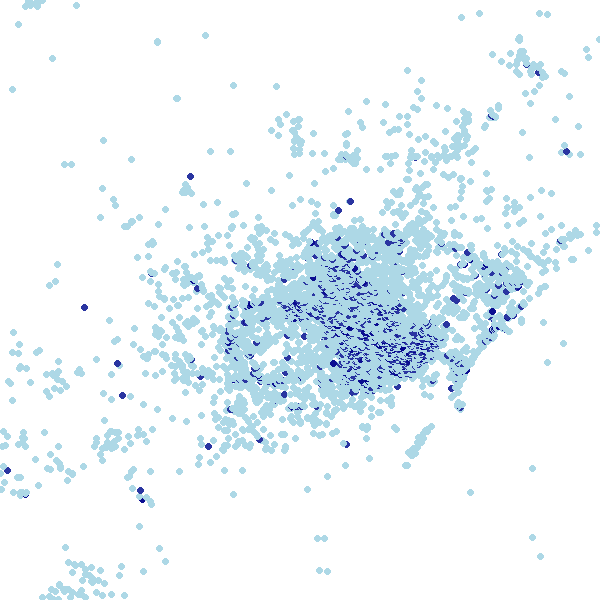

In [7]:
%%time

tf.spread(tf.interpolate(ds.Canvas().points(df,'lng', 'lat')), px=3)

In [11]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

x_range=(-8250000,-8210000)
y_range=(4965000,4990000)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=900, plot_height=600, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
               x_range=x_range, y_range=y_range, 
               outline_line_color=None,
            min_border=0, min_border_left=0, min_border_right=0,
            min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

from IPython.core.display import HTML, display
display(HTML("<style>.container { width:90% !important; }</style>"))

Loading BokehJS ...

In [12]:
%%time
cvs = ds.Canvas(plot_width=800, plot_height=500)
agg = cvs.points(df, 'lng', 'lat')
img = tf.interpolate(agg)

CPU times: user 17.2 ms, sys: 9.43 ms, total: 26.6 ms
Wall time: 24.8 ms


/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


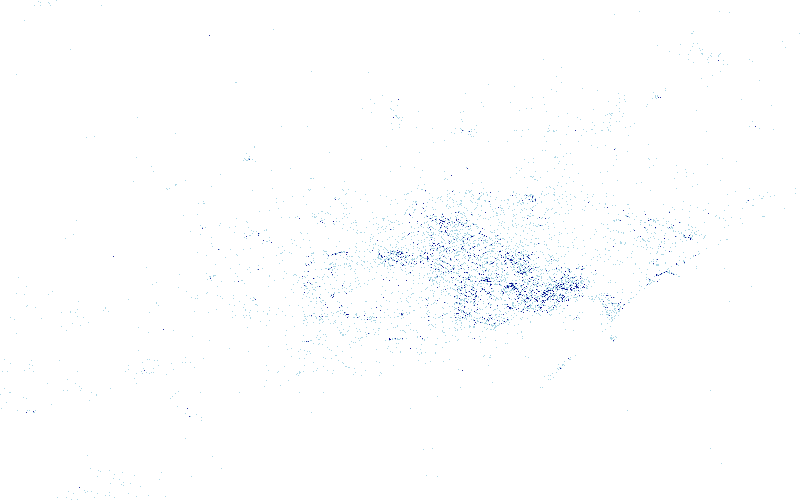

In [13]:
img

In [14]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from datashader.colors import Hot

def create_image(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, )
    agg = cvs.points(df, 'lng', 'lat')
    img = tf.interpolate(agg, cmap=Hot)
    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color="black",responsive=True, plot_width=int(900*1.5), plot_height=int(600*1.5))
InteractiveImage(p, create_image)

/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


In [15]:
#-0,4350, 39,2791, -0,2750, 39,5662
# 39.444855, -0.410510, 39.486869, -0.281764
#-0.407181	39.433541	-0.298691	39.507322
#Barcelona 2.109375,41.3623801295,2.2175216675,41.4200746738
# Eixample 2.1318626404,41.3835063948,2.1873950958,41.4098402048

df2 = pd.DataFrame([], columns=['category', 'category_id','name', 'lat', 'lng'])    
for i in range (len(data)):
    # print data[i]
    cat = data[i]['categories'][0]['icon']['prefix'].split("/")[5]
    cat_id = foursquare_categories_dict[cat]
    name = data[i]['name']
    lat = data[i]['location']['lat']
    lng = data[i]['location']['lng']
    if(lat > 41.3623801295 and lat < 41.4200746738):
         if(lng > 2.1318626404 and lng < 2.1873950958 ):
                df2.loc[i] = [cat, cat_id, name, lat, lng]
                
    


In [16]:
df2.size

26505

CPU times: user 27.6 ms, sys: 21 ms, total: 48.6 ms
Wall time: 75.4 ms


/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


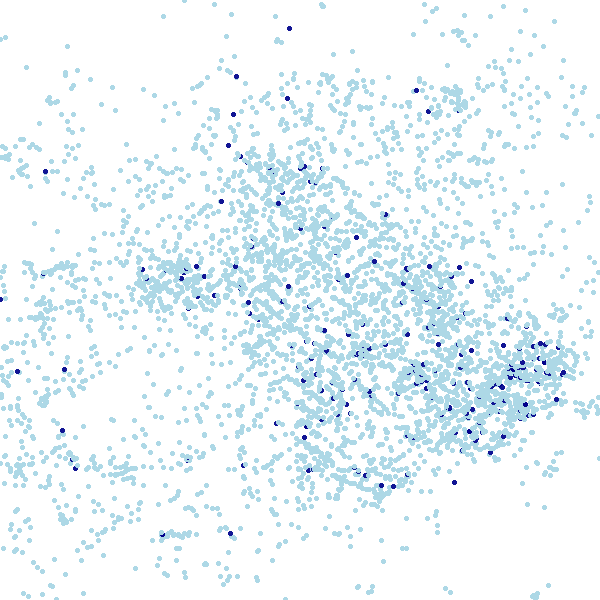

In [21]:
%%time

tf.spread(tf.interpolate(ds.Canvas().points(df2,'lng', 'lat')), px=2)

In [18]:
%%time
cvs2 = ds.Canvas(plot_width=200, plot_height=125)
agg2 = cvs.points(df2, 'lng', 'lat')
img2 = tf.interpolate(agg2)


CPU times: user 15.8 ms, sys: 2.02 ms, total: 17.8 ms
Wall time: 26.9 ms


/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


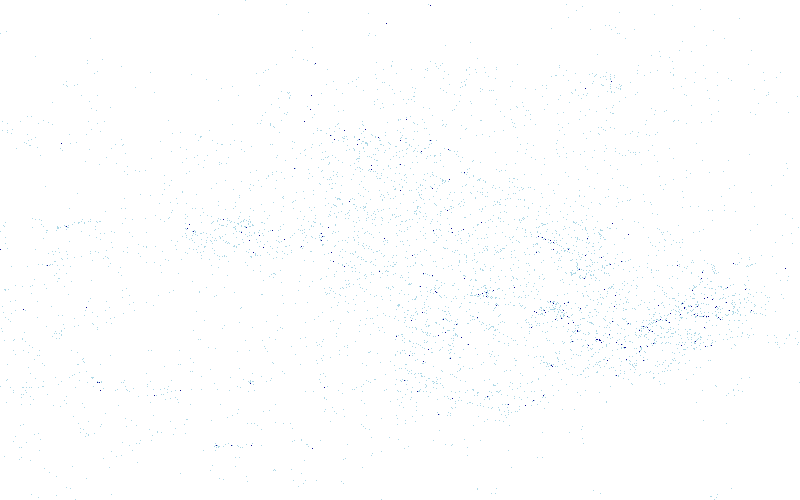

In [19]:
img2

In [20]:
def create_image(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, )
    agg = cvs2.points(df2, 'lng', 'lat')
    img = tf.interpolate(agg2, cmap=Hot)
    return tf.dynspread(img2, threshold=0.5, max_px=4)

p = base_plot(background_fill_color="black",responsive=True, plot_width=int(900*1.5), plot_height=int(600*1.5))
InteractiveImage(p, create_image)

/Users/dsolans/anaconda/lib/python2.7/site-packages/datashader/transfer_functions.py:161: DeprecationWarning: `interpolate` is deprecated; use `shade` instead
  warnings.warn(w)


In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from functools import partial
import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image
from datashader.colors import viridis, colormap_select

from colorcet import fire
from IPython.core.display import HTML, display

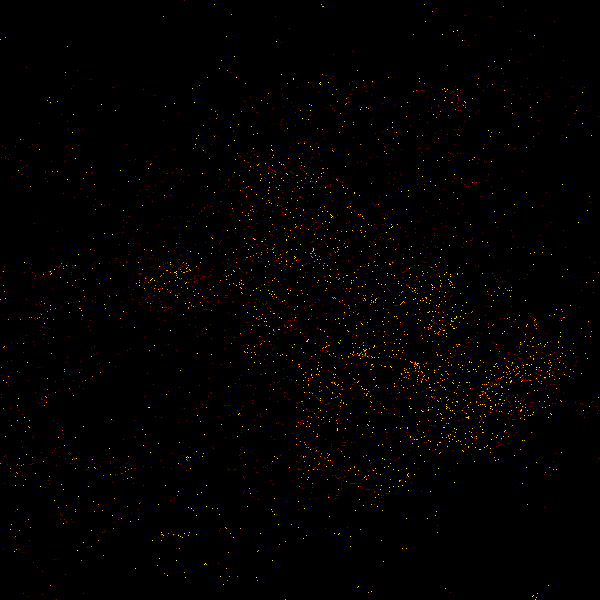

In [23]:
sns.set_style('whitegrid')
%matplotlib inline
cm = partial(colormap_select)

cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.points(df2, 'lng', 'lat', ds.mean('category_id'))#, ds.mean('z_col'))
img = tf.shade(agg, cmap=cm(fire, 0.25), how='cbrt')

export_image(img,'datashader_total', background='black')


In [24]:
print agg

<xarray.DataArray (y_axis: 600, x_axis: 600)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * y_axis   (y_axis) float64 41.36 41.36 41.36 41.36 41.36 41.36 41.36 ...
  * x_axis   (x_axis) float64 2.132 2.132 2.132 2.132 2.132 2.132 2.132 ...


In [25]:
df2.head()

category  category_id                         name        lat  \
153            food          0.0          El Asador de Aranda  41.413380   
154  parks_outdoors          2.0  Parc de la Creueta del Coll  41.418187   
155       nightlife          3.0                       Mirabé  41.416212   
158       nightlife          3.0                     Mirablau  41.416044   
162            food          0.0                  Casa Fausto  41.419706   

          lng  
153  2.134377  
154  2.147036  
155  2.132363  
158  2.131927  
162  2.148964

/Users/dsolans/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


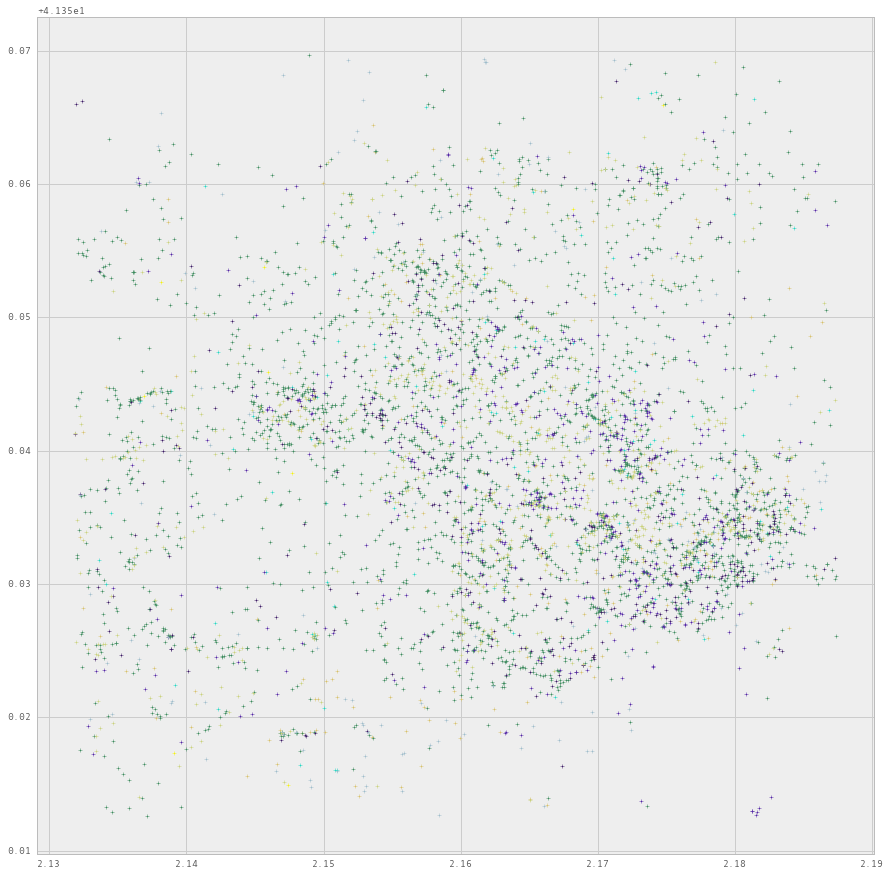

In [26]:
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt


x = df2['lng']
y = df2['lat']
labels = df2['category']

dfPlot = pd.DataFrame(dict(x=x, y=y, label=labels))

groupsPlot = dfPlot.groupby('label')

# Plot
plt.figure(figsize=[10,10])
plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)
colors = pd.tools.plotting._get_standard_colors(len(groupsPlot), color_type='random')

fig, ax = plt.subplots(figsize=(15,15))
ax.set_color_cycle(colors)

ax.margins(0.05)
for name, group in groupsPlot:
    ax.plot(group.x, group.y, marker='+', linestyle='', ms=3.5, label=name)
#ax.legend(numpoints=1, loc='upper left')

plt.show()

[u'food' 0.0 u'building' 6.0 u'parks_outdoors' 2.0 u'arts_entertainment'
 5.0 u'travel' 4.0 u'shops' 1.0 u'nightlife' 3.0 u'education' 7.0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1250ab8d0>]], dtype=object)

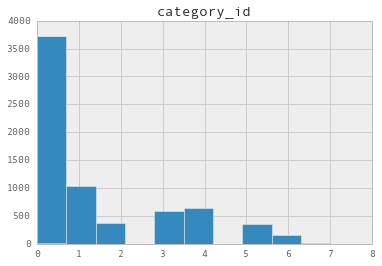

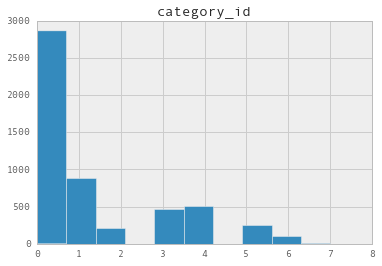

In [28]:
print pd.unique(df[['category', 'category_id']].values.ravel())
df.hist(column='category_id')
df2.hist(column='category_id')

In [29]:
import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
with open('../datasets/divisiones_administrativas/barris/barris_geo.json') as f:
    barrios = json.load(f)

# construct point based on lon/lat returned by geocoder
point1 = Point(2.170095, 41.387010) #pl catalonia
point2  = Point(2.157412, 41.398908) #home
point3 = Point(2.078568733480877,41.46722302260856) #4s first venue 

# check each polygon to see if it contains the point
for barrio in barrios['features']:
    polygon = shape(barrio['geometry'])
    if polygon.contains(point1):
        print 'Found polygon containing point1 (pl.Catalonia):', barrio['properties'][u'N_Barri']
    elif polygon.contains(point2):
        print 'Found polygon containing point2 (home):', barrio['properties'][u'N_Barri']
    elif polygon.contains(point3):
        print 'Found polygon containing point3 (4s venue):', barrio['properties'][u'N_Barri']


Found polygon containing point1 (pl.Catalonia): la Dreta de l'Eixample
Found polygon containing point2 (home): la Vila de Gràcia


In [30]:
# load GeoJSON file containing districts
with open('../datasets/divisiones_administrativas/districtes/districtes_geo.json') as f:
     districts = json.load(f)
# construct point based on lon/lat returned by geocoder
point1 = Point(2.170095, 41.387010) #pl catalonia
point2  = Point(2.157412, 41.398908) #home

# check each polygon to see if it contains the point
for distrito in districts['features']:
    polygon = shape(distrito['geometry'])
    if polygon.contains(point1):
        print 'Found polygon containing point1 (pl.Catalonia):', distrito['properties'][u'N_Distri']
    elif polygon.contains(point2):
        print 'Found polygon containing point2 (home):', distrito['properties'][u'N_Distri']


Found polygon containing point1 (pl.Catalonia): Eixample
Found polygon containing point2 (home): Gràcia


In [75]:
df2["neighborhood"] = ""
df2["district"] = ""
for index, venue in df2.iterrows():
    point = Point(venue.lng, venue.lat)
    for barrio in barrios['features']:
        polygon = shape(barrio['geometry'])
        if polygon.contains(point):
            df2.set_value(index,'neighborhood', barrio['properties'][u'N_Barri'])
    for district in districts['features']:
        polygon = shape(district['geometry'])
        if polygon.contains(point):
            df2.set_value(index,'district',district['properties'][u'N_Distri'])

In [76]:
df2.head()

category  category_id                         name        lat  \
153            food          0.0          El Asador de Aranda  41.413380   
154  parks_outdoors          2.0  Parc de la Creueta del Coll  41.418187   
155       nightlife          3.0                       Mirabé  41.416212   
158       nightlife          3.0                     Mirablau  41.416044   
162            food          0.0                  Casa Fausto  41.419706   

          lng                neighborhood             district  
153  2.134377  Sant Gervasi - la Bonanova  Sarrià-Sant Gervasi  
154  2.147036                     el Coll               Gràcia  
155  2.132363  Sant Gervasi - la Bonanova  Sarrià-Sant Gervasi  
158  2.131927  Sant Gervasi - la Bonanova  Sarrià-Sant Gervasi  
162  2.148964                     el Coll               Gràcia

In [77]:
out = df.to_json(orient='records')[1:-1].replace('},{', '} {')
with open('venuesBcnLabeled.json', 'w') as f:
    f.write(out)

In [78]:
barrios_data = {}
for barrio in barrios['features']:
    polygon = shape(barrio['geometry'])
    barrios_data[barrio['properties'][u'N_Barri']] = barrio['properties']

print barrios_data['el Raval']                                                  

{u'Homes': 26553, u'Perim': 5557.372878, u'Coord_Y': 4581363.15123, u'Coord_X': 430732.006258, u'Dones': 21850, u'Area': 1098392.91379, u'N_Barri': u'el Raval', u'C_Distri': u'01', u'C_Barri': u'01', u'N_Distri': u'Ciutat Vella', u'WEB_4': u'http://www.bcn.cat/estadistica/catala/dades/inf/barris/a2011/barri1.pdf', u'WEB_2': u'http://www.bcn.cat/estadistica/catala/dades/inf/anuari/index.htm', u'WEB_3': u'http://www.bcn.cat/estadistica/catala/dades/guiadt01/index.htm', u'WEB_1': u'http://www.bcn.cat/ciutatvella'}


In [100]:
neighborhoods_unique = df2['neighborhood'].unique()
districts_unique =  df2['district'].unique()
print "Neighborhoods: "+str(len(neighborhoods_unique))
print neighborhoods_unique
print "\n"
print "Districts: "+str(len(districts_unique))
print districts_unique
print "\n"

Neighborhoods: 35
[u'Sant Gervasi - la Bonanova' u'el Coll' u'Vallcarca i els Penitents'
 u'el Carmel' u'Can Bar\xf3' u'la Salut' u'el Putxet i el Farr\xf3'
 u'Sant Gervasi - Galvany' u'el Guinard\xf3' u"el Camp de l'Arpa del Clot"
 u'la Sagrada Fam\xedlia' u'el Clot' u'el Fort Pienc' u'Hostafrancs'
 u"la Nova Esquerra de l'Eixample" u'les Corts' u'Sants'
 u'la Marina de Port' u'la Bordeta' '' u'el Poble Sec'
 u'la Font de la Guatlla' u'el Barri G\xf2tic' u'el Raval'
 u'la Barceloneta' u'la Marina del Prat Vermell' u'la Vila de Gr\xe0cia'
 u"el Camp d'en Grassot i Gr\xe0cia Nova" u'el Baix Guinard\xf3'
 u"la Dreta de l'Eixample" u'les Tres Torres'
 u"l'Antiga Esquerra de l'Eixample" u'Sant Antoni'
 u'Sant Pere, Santa Caterina i la Ribera'
 u'el Parc i la Llacuna del Poblenou']


Districts: 9
[u'Sarri\xe0-Sant Gervasi' u'Gr\xe0cia' u'Horta-Guinard\xf3'
 u'Sant Mart\xed' u'Eixample' u'Sants-Montju\xefc' u'Les Corts' ''
 u'Ciutat Vella']




In [107]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

KeyError: 'c'

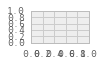

In [105]:
draw_histograms(df2, 'category_id', 5, 5)

In [108]:
fig=plt.figure()
for idx, district in enumerate(districts_unique):
     ax=fig.add_subplot(n_rows,n_cols,idx+1)
    df2[df2['district'] == district].hist(column='category_id')
    ax.title("District: "+district)
fig.tight_layout()  # Improves appearance a bit.
plt.show()


IndentationError: unindent does not match any outer indentation level (<ipython-input-108-f5234c97b233>, line 4)

/Users/dsolans/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


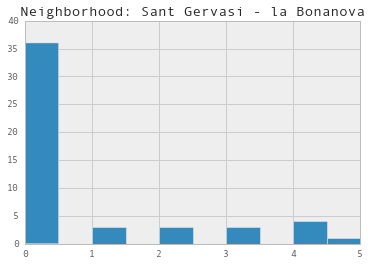

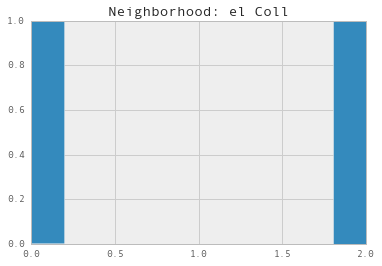

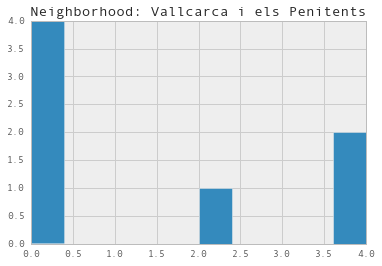

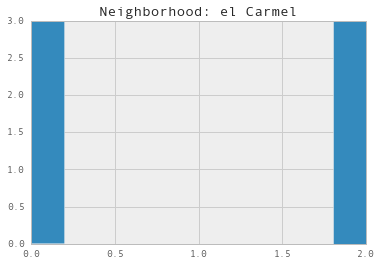

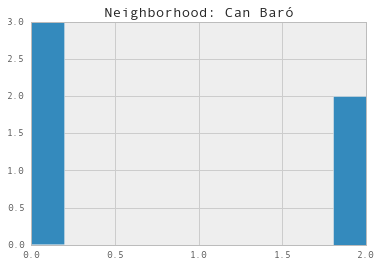

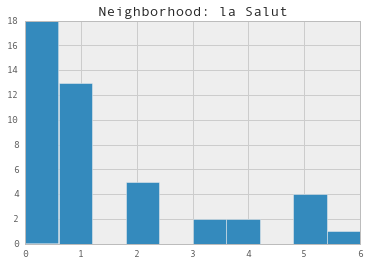

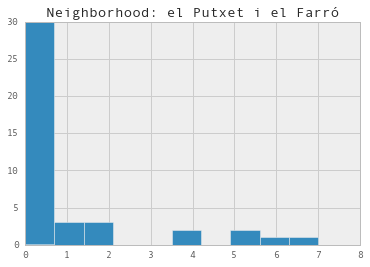

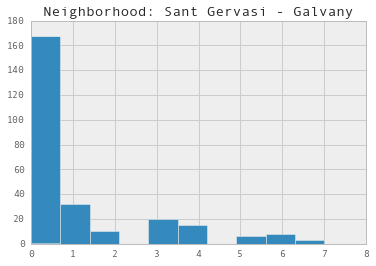

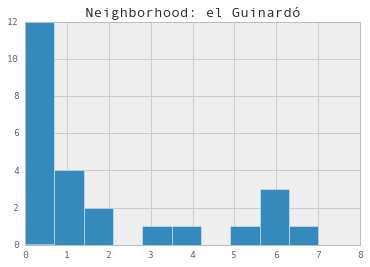

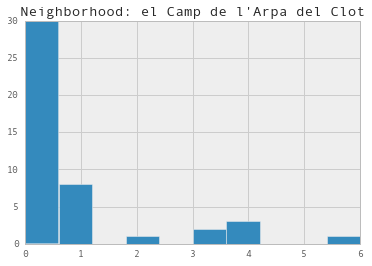

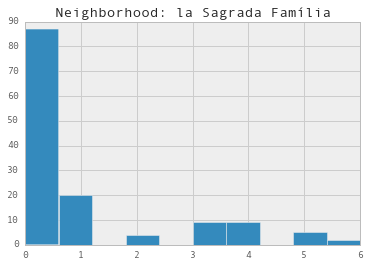

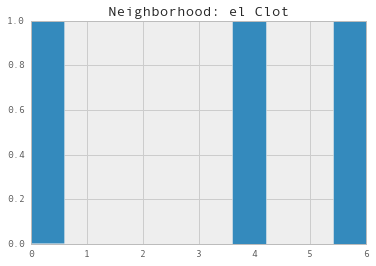

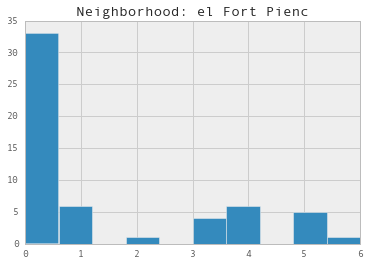

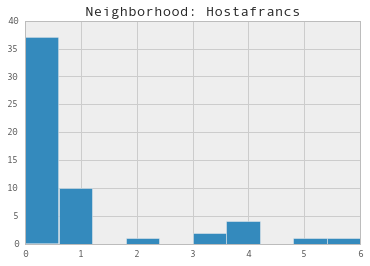

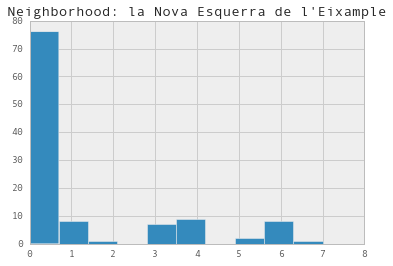

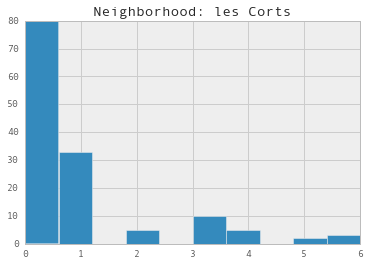

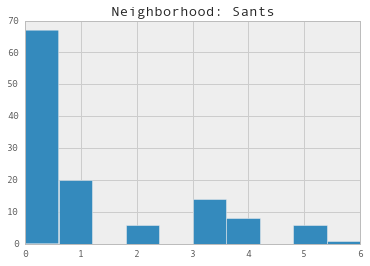

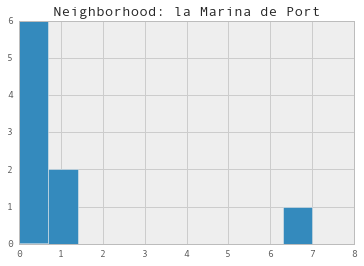

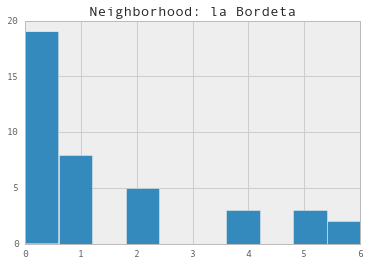

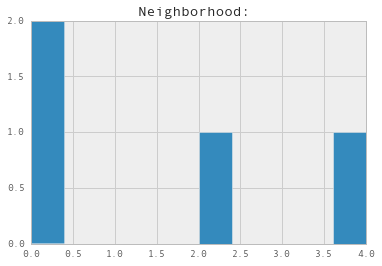

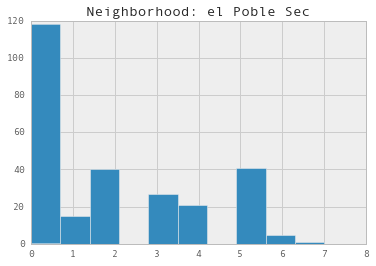

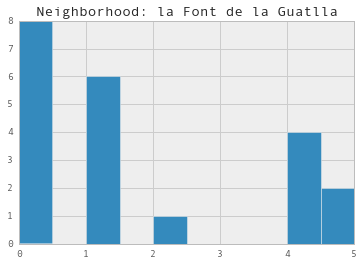

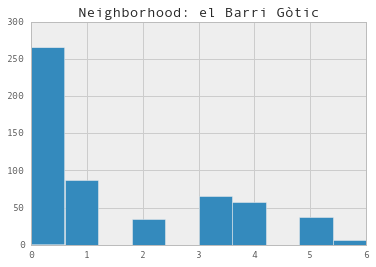

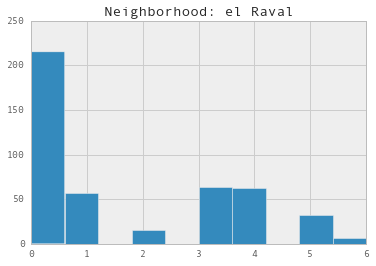

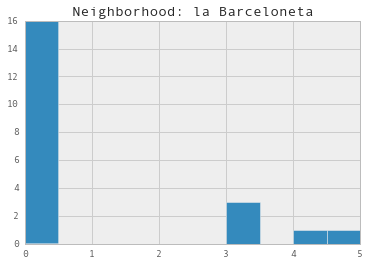

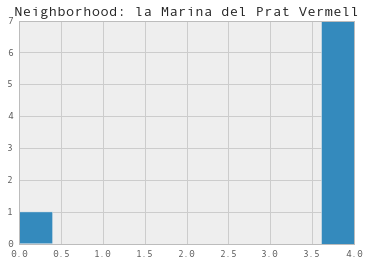

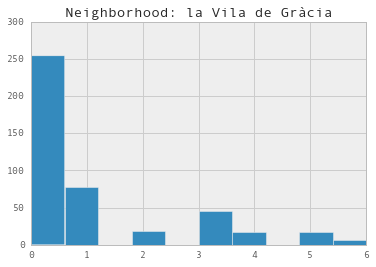

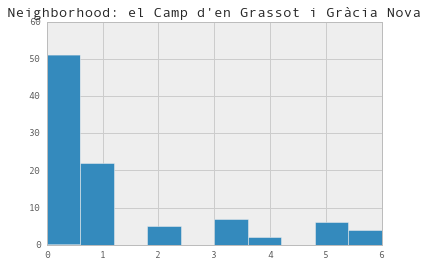

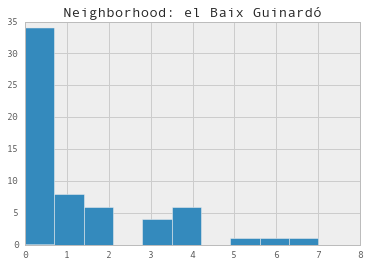

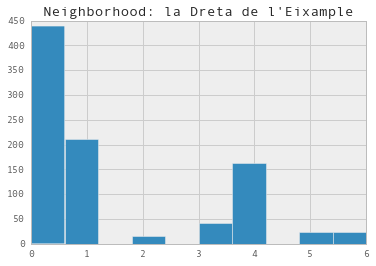

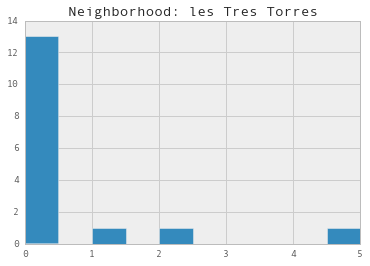

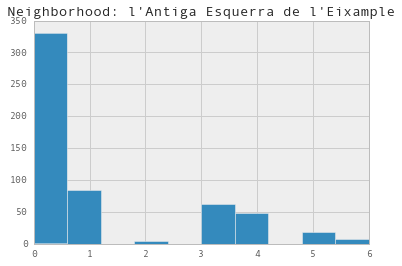

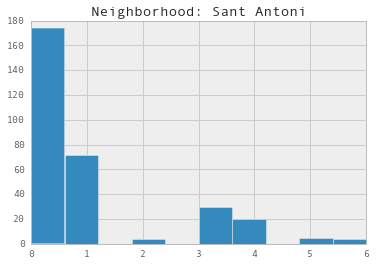

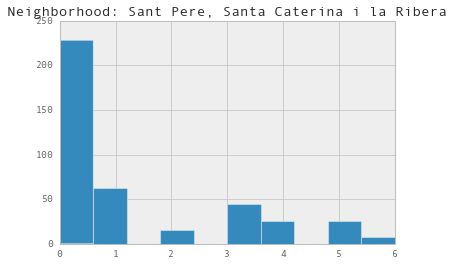

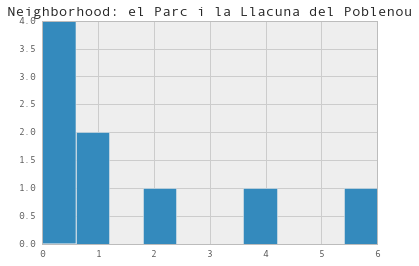

In [96]:
for neighborhood in neighborhoods_unique:
    df2[df2['neighborhood'] == neighborhood].hist(column='category_id')
    plt.title("Neighborhood: "+neighborhood)